# What is the likelihood of an individual using marijuana/cannabis based on the age that individual started smoking cigarettes and/or had their first drink of alcohol

## INTRODUCTION

As the number of individuals who disapprove of marijuana use declines, we have seen the number of marijuana users increase among young adolescents. (Wright et al, 2017). A study by Kirby and Barry found that students who drank alcohol were more likely to use drugs and argue that alcohol prevention should be the main focus in schools rather than solely focusing on drug use, since alcohol use increases the likelihood of students using drugs (2012). Furthermore, they found that  more current e-cigarette users than non-users admitted to using alcohol, marijuana, and illegal drugs in the previous year. Also, those who now use e-cigarettes were more likely to admit to regularly using these drugs. Based on our research we found that young individuals may try alcohol and smoking for various reasons, including peer pressure, curiosity, social norms, family history of substance use, and coping with stress or anxiety. Peer pressure is a significant factor in substance initiation among young people, as they may feel compelled to conform to their peers' behaviors (Kuntsche et al., 2005). Exposure to alcohol and smoking in media and pop culture can also create a perception that substance use is a normal and acceptable behavior (Donovan, 2004). A family history of substance use is a risk factor for young individuals to experiment with alcohol and smoking. Children of parents who smoke or drink heavily are more likely to try these substances at a younger age (Donovan, 2004). To help us understand these findings, we chose the data set from the Canadian student tobacco alcohol and drugs survey administered to students from grades 7 to 12. We want to see if young nicotine and alcohol consumption would influence whether or not an individual uses marijuana.


We will use the following two variables from the data set and use knn-classification,

`ALC_030` : Age which an individual first tried alcohol

`SS_020` : Age which and individual first tried smoking cigarettes

`CAN_040` : How often an individual has used marijuana in the last 30 days

*Dataset:* Health Canada; PROPEL Centre for Population Health Impact, 2020, "2018/2019 Canadian student tobacco, alcohol and drugs survey", https://hdl.handle.net/11272.1/AB2/WEFOHY, Abacus Data Network, V1, UNF:6:b30sgE/74ieEDNG49VXOJQ== [fileUNF]



## METHODS



First we load the libraries that carry packages we will use for our analysis. (Note: The function `suppressMessages()` is to hide the long command that pops out when attaching the libraries so that the report will look tidier).

In [40]:
library(repr) 
library(tidyverse) 
library(tidymodels)
options(repr.matrix.max.rows = 6)
#source('tests.R')
#source("cleanup.R")

set.seed(9999)

### Reading the data

Firstly, our data set separator use tables, so we read the data from our GitHub repository using the `read_tsv` function. We'll load our data set below, and show the first 6 rows of the data.

In [41]:
drugdata <- read_tsv("cstdata.tab") |> suppressMessages()

head(drugdata)

SCANID,MODULE,PROVID,SCHID,GRADE,SEX,SS_010,SS_020,TS_011,TV_010,⋯,DVTY2ST,DVLAST30,DVAMTSMK,DVCIGWK,DVNDSMK,DVAVCIGD,DVRES,DVURBAN,DVHHINC2,WTPP
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100224,1,35,3589267,9,1,1,13,2,3,⋯,1,1,1,8,5,2,1,2,60000,33.15
100225,1,35,3589267,9,1,1,13,1,1,⋯,1,1,10,70,7,10,1,2,60000,33.15
100226,1,35,3589267,12,1,2,96,4,3,⋯,7,2,96,996,96,96,3,2,60000,75.14
100227,1,35,3589267,12,2,1,2,3,2,⋯,4,1,0,0,0,0,1,2,60000,105.70
100228,1,35,3589267,12,1,1,2,3,3,⋯,6,2,96,996,96,96,1,2,60000,75.14
100229,1,35,3589267,11,1,2,96,4,3,⋯,7,2,96,996,96,96,1,2,60000,63.87


### Tidying and cleaning the data

We select only the data that we need for the method `ALC_030`, `SS_020`, and `CAN_040`, and re-name the columns for it to be easily understood by the reader `alcohol_age`, `cigarette_age`, and `marijuana_fqcy`. 

We then filter the data to only show responses that are needed for our analysis. Therefore, we will filter out any responses that include "not stated", which are `alcohol_age`, `cigarette_age`,  `marijuana_fqcy`, `alcohol_age2`, and `cigarette_age2`. 

Next, for those who have never tried cigarettes or alcohol, they were given a value of 99. For easier visualization when plotting a bar graph, we let the value of 99 be represented as 20. In other words, those who have never tried cigarettes or alcohol are represented as the age of 20.  Once again, we load the first 6 rows of our tidy data.

As additional information, each possible predictor meaning is as follows:
- `alcohol_age` : Age which an individual first tried alcohol
- `cigarette_age` : Age which and individual first tried smoking cigarettes
- `marijuana_fqcy` : How often an individual has used marijuana in the last 30 days


In [42]:
selected_drugdata <- select(drugdata, ALC_030 , SS_020, CAN_040)
colnames(selected_drugdata) <- c("alcohol_age","cigarette_age", "marijuana_fqcy")

filtered_drugdata <- selected_drugdata |>
    filter(between(alcohol_age,8,18) | alcohol_age == 99) |>
    filter(between(cigarette_age,8,18)  | cigarette_age == 99) |>
    filter(between(marijuana_fqcy,1,6))

filtered_drugdata2 <- filtered_drugdata |>
    mutate(alcohol_age2 = case_when(
        alcohol_age == "99" ~ 20,
        alcohol_age == "8"~8,
        alcohol_age == "9"~9,
        alcohol_age == "10"~10,
        alcohol_age == "11"~11,
        alcohol_age == "12"~12,
        alcohol_age == "13"~13,
        alcohol_age == "14"~14,
        alcohol_age == "15"~15,
        alcohol_age == "16"~16,
        alcohol_age == "17"~17,
        alcohol_age == "18"~18)) |>
    mutate(cigarette_age2 = case_when(
        cigarette_age == "99" ~ 20,
        cigarette_age == "8"~8,
        cigarette_age == "9"~9,
        cigarette_age == "10"~10,
        cigarette_age == "11"~11,
        cigarette_age == "12"~12,
        cigarette_age == "13"~13,
        cigarette_age == "14"~14,
        cigarette_age == "15"~15,
        cigarette_age == "16"~16,
        cigarette_age == "17"~17,
        cigarette_age == "18"~18))

head(selected_drugdata)

head(filtered_drugdata2)

alcohol_age,cigarette_age,marijuana_fqcy
<dbl>,<dbl>,<dbl>
13,13,96
10,13,6
13,96,2
14,2,2
12,2,2
8,96,96


alcohol_age,cigarette_age,marijuana_fqcy,alcohol_age2,cigarette_age2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,13,6,10,13
15,17,2,15,17
14,12,5,14,12
14,15,1,14,15
15,8,4,15,8
10,12,3,10,12


We then mutate a new column to make the predictor a factor. Instead of having the frequency an individual smokes marijuana, for simplicity, we grouped them into 2 groups - **yes** has smoked marijuana in the last 30 days, and **no**, has not smoked marijuana in the last 30 days.

In [43]:
mutated_data <- filtered_drugdata2 |>
    mutate(tried_marijuana = case_when(
        marijuana_fqcy == "1" ~ "no",
        marijuana_fqcy == "2" ~ "yes",
        marijuana_fqcy == "3" ~ "yes",
        marijuana_fqcy == "4" ~ "yes",
        marijuana_fqcy == "5" ~ "yes",
        marijuana_fqcy == "6" ~ "yes")) |>
    mutate(tried_marijuana = as_factor(tried_marijuana))|>
    filter(!(tried_marijuana == "NA"))

head(mutated_data) 

alcohol_age,cigarette_age,marijuana_fqcy,alcohol_age2,cigarette_age2,tried_marijuana
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
10,13,6,10,13,yes
15,17,2,15,17,yes
14,12,5,14,12,yes
14,15,1,14,15,no
15,8,4,15,8,yes
10,12,3,10,12,yes


Table 1 : Shows all the variables we will be working with

Below shows the number of respondents in each category. 

In [44]:
respondents_alcohol <- mutated_data |>
        group_by(alcohol_age2, tried_marijuana) |>
        summarize(count=n()) |> suppressMessages()


respondents_cigarettes <- mutated_data |>
    group_by(cigarette_age2,tried_marijuana) |>
    summarize(count=n()) |> suppressMessages()

In [45]:
respondents_alcohol

alcohol_age2,tried_marijuana,count
<dbl>,<fct>,<int>
8,yes,320
8,no,122
9,yes,89
⋮,⋮,⋮
18,no,6
20,yes,72
20,no,32


Table 2.1 : Shows the number of respondents to the question "How old were you when you first had a drink of alcohol that 
was more than just a sip?" in each age category who have smoked marijuana and have not smoked marijuana in the last 30 days.

In [46]:
respondents_cigarettes

cigarette_age2,tried_marijuana,count
<dbl>,<fct>,<int>
8,yes,224
8,no,79
9,yes,95
⋮,⋮,⋮
18,no,8
20,yes,29
20,no,13


Table 2.2 : Shows the number of respondents to the question "How old were you when you first used marijuana or 
cannabis?" in each age category who have smoked marijuana and have not smoked marijuana in the last 30 days.

For easy visualization, we plotted the number of respondents in each category into a bar chart. We also coloured the bar plot into 2 colours to represent those who have tried marijuana in the past 30 days and those who did not. The first graph is alcohol consumption age vs number of individuals, and the second graph is cigarette use age vs number of individuals.

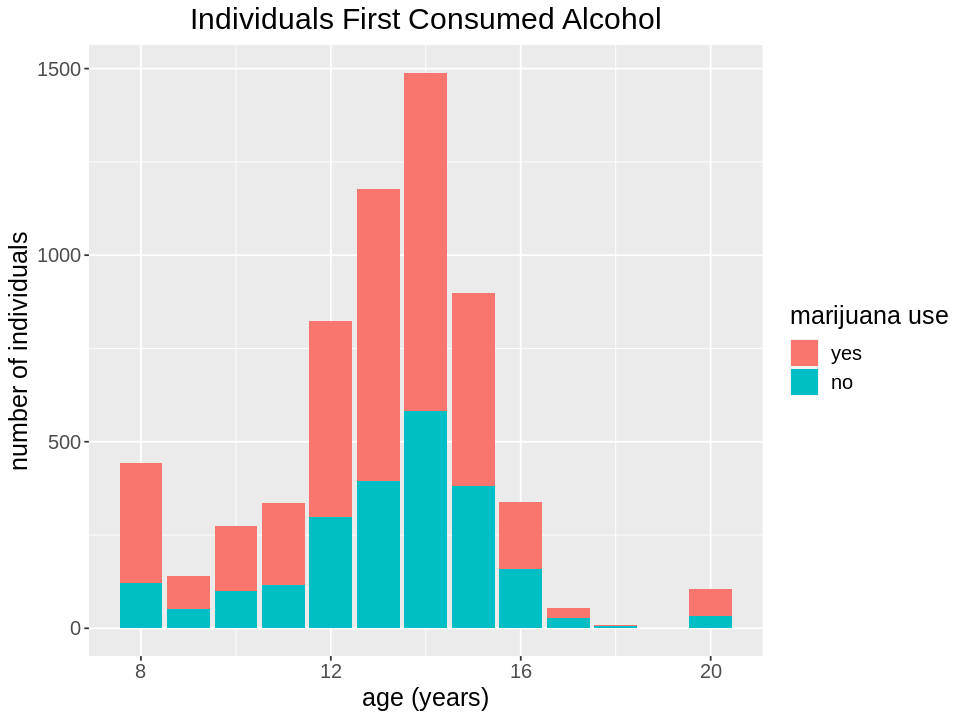

In [47]:
options(repr.plot.width = 8, repr.plot.height = 6)

barplot <- respondents_alcohol |>
    ggplot(aes(x= alcohol_age2, y = count, fill = factor(tried_marijuana)))+
    geom_bar(stat= 'identity') +
    labs(x = "age (years)", y = "number of individuals", 
         title = "Individuals First Consumed Alcohol", fill = "marijuana use") +
    theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))

barplot

Graph 1 : Shows a visualization of table2.1

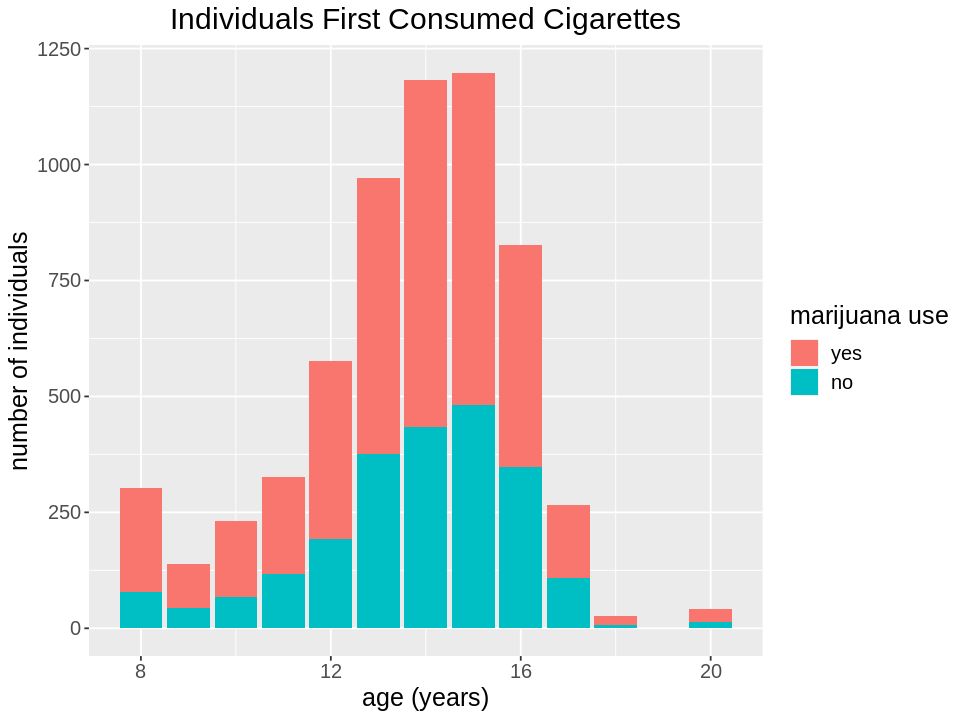

In [48]:
options(repr.plot.width = 8, repr.plot.height = 6)

barplot2 <- respondents_cigarettes |>
    ggplot(aes(x= cigarette_age2, y = count, fill = factor(tried_marijuana)))+
    geom_bar(stat= 'identity') +
    labs(x = "age (years)", y = "number of individuals", 
         title = "Individuals First Consumed Cigarettes", fill = "marijuana use") +
    theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))

barplot2

Graph 2 : Shows a visualization of table 2.2

### Splitting the data into training and testing set

Now, we can split the data set into training data, and testing data. We then create the recipe and scale all data. The exploratory analysis and model below will only be built based on the training data. For the testing data, we will only use it to evaluate the accuracy of our prediction and summarize how well our prediction does. Furthermore, we set `strata = tried_marijuana` so that our target class is people who tried marijuana. Lastly, we use 75 percent of our original data set as our training data using `prop = 0.75`. This number of splitting is reasonable because we have enough data for training and testing. 

In [49]:
set.seed(1)
drugdata_split <- initial_split(mutated_data, prop = 0.75, strata = tried_marijuana)  
drugdata_train <- training(drugdata_split)
drugdata_test <- testing(drugdata_split)

In [50]:
drugdata_train

alcohol_age,cigarette_age,marijuana_fqcy,alcohol_age2,cigarette_age2,tried_marijuana
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
14,15,1,14,15,no
14,14,1,14,14,no
8,9,1,8,9,no
⋮,⋮,⋮,⋮,⋮,⋮
14,14,3,14,14,yes
8,12,4,8,12,yes
11,10,4,11,10,yes


Table 3 : Training data set that will be used to build the model

In [51]:
drugdata_test

alcohol_age,cigarette_age,marijuana_fqcy,alcohol_age2,cigarette_age2,tried_marijuana
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
15,17,2,15,17,yes
15,16,4,15,16,yes
14,15,1,14,15,no
⋮,⋮,⋮,⋮,⋮,⋮
11,12,1,11,12,no
13,13,1,13,13,no
10,12,2,10,12,yes


Table 4 : Testing data set that will be used to evaluate the accuracy of the model

### Classification model

Since our predictor variables `alcohol_age2` and `cigarette_age2` do not vary, we will not need to scale the data.

In [52]:
set.seed(9999)
drug_recipe <- recipe(tried_marijuana ~  alcohol_age2 + cigarette_age2 , data = drugdata_train) 

drug_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



Next, we will be using the cross-validation method for k values from 1-30. We'll divide the training data into 5 parts and let `strata = tried_marijuana`, the variable we are predicting. Then, plot the accuracy versus the number of k plots to find the optimal k-value we want to use. 


In [53]:
set.seed(9999)

drug_vfold <- vfold_cv(drugdata_train, v = 5, strata = tried_marijuana)

drug_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
    set_engine("kknn")|>
    set_mode("classification")

drug_spec


K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [54]:
set.seed(9999)

k_values1 <- tibble(neighbors = seq(1,30))

drug_workflow <- workflow()|>
    add_recipe(drug_recipe)|>
    add_model(drug_spec)|>
    tune_grid(resamples = drug_vfold, grid = k_values1)

In [56]:
set.seed(9999)

drug_accuracies <- drug_workflow |>
    collect_metrics() |>
    filter(.metric == "accuracy")

drug_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.3774358,5,0.001406766,Preprocessor1_Model01
2,accuracy,binary,0.3805028,5,0.001955022,Preprocessor1_Model02
3,accuracy,binary,0.3794080,5,0.002389527,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,binary,0.4615534,5,0.004253325,Preprocessor1_Model28
29,accuracy,binary,0.4635242,5,0.006746037,Preprocessor1_Model29
30,accuracy,binary,0.4626482,5,0.006733925,Preprocessor1_Model30


Table 5 : Shows the mean accuracy of predictions across k-values from 1 to 30

In [57]:
k_max <- drug_accuracies |>
    arrange(desc(mean))|>
    slice(1)|>
    select(neighbors)|>
    pull()

k_best_accuracy <- drug_accuracies |>
    arrange(desc(mean))|>
    slice(1)|>
    select(mean)|>
    pull()

k_max

[1] 29

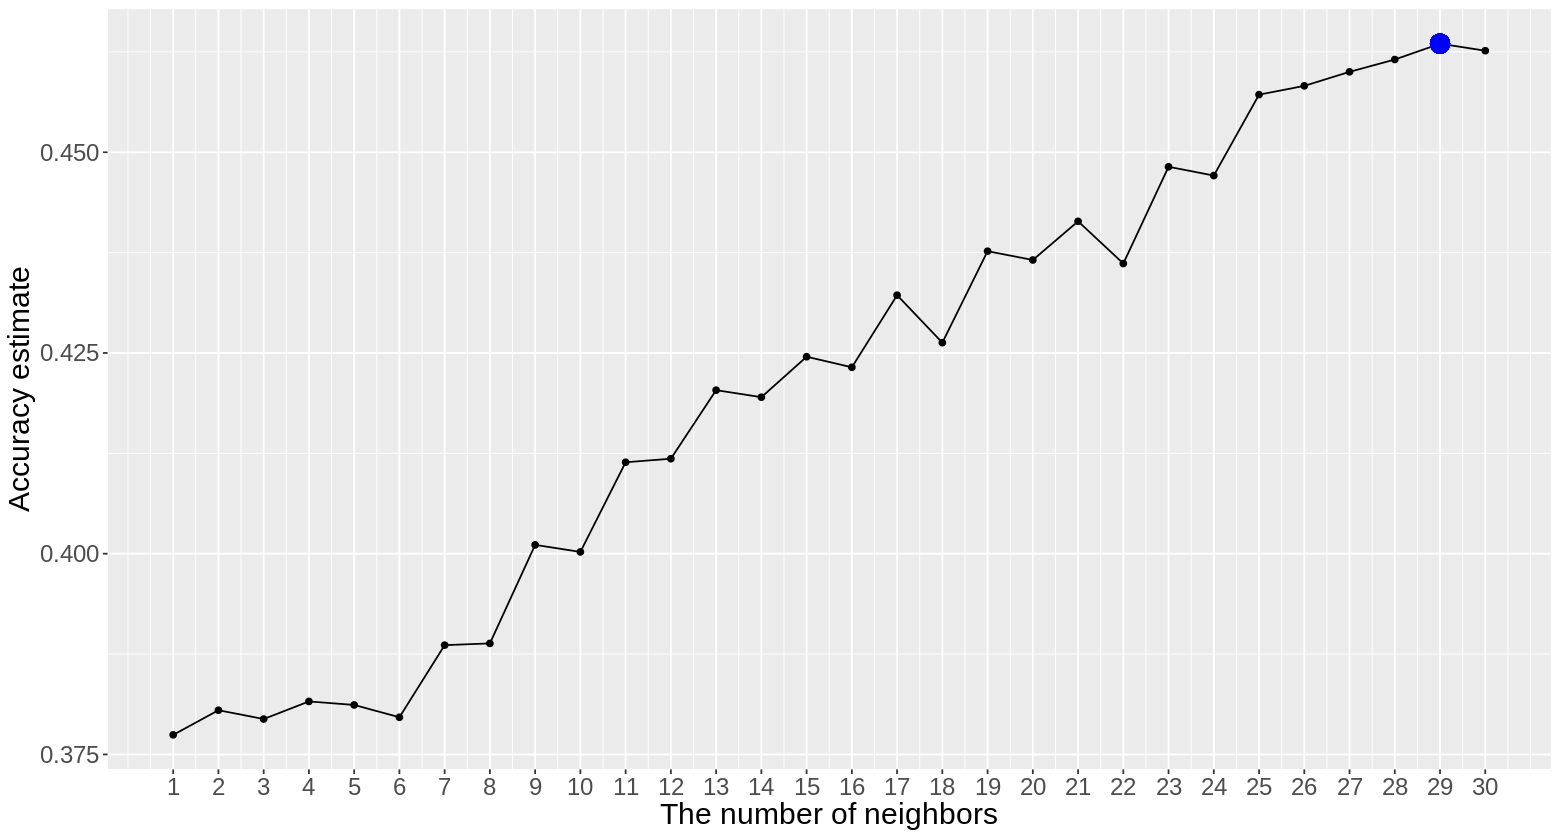

In [58]:
options(repr.plot.width = 13, repr.plot.height = 7)

drug_accuracies_plot <- drug_accuracies |>
    ggplot(aes(x = neighbors, y = mean))+
    geom_line()+
    geom_point()+
    geom_point(aes(x=k_max, y= k_best_accuracy), size = 5, colour = "blue") +
    labs(x = "The number of neighbors", y = "Accuracy estimate")+
    scale_x_continuous(breaks = seq(1,30, by = 1))+
    theme(text = element_text(size = 18))

drug_accuracies_plot

### Prediction model results

Now that we found our optimal k is 29, we can use this number to build the final prediction model. We will also calculate the accuracies of our model and create a confusion matrix to see exactly how many predictions were correct.

In [59]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 29)|>
    set_engine("kknn")|>
    set_mode("classification")

knn_result <- workflow()|>
    add_recipe(drug_recipe)|>
    add_model(knn_spec)|>
    fit(drugdata_train)

knn_spec

knn_result

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 29
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(29,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.5338445
Best kernel: rectangular
Best k: 29

In [60]:
drug_prediction <- knn_result |>
    predict(drugdata_test)|>
    bind_cols(drugdata_test)


drug_final_accuracy <- drug_prediction |>
    metrics(truth = tried_marijuana, estimate = .pred_class)|>
    filter(.metric == "accuracy")|>
    select(.estimate)|>
    pull()

drug_prediction

drug_final_accuracy


.pred_class,alcohol_age,cigarette_age,marijuana_fqcy,alcohol_age2,cigarette_age2,tried_marijuana
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
no,15,17,2,15,17,yes
no,15,16,4,15,16,yes
no,14,15,1,14,15,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮
no,11,12,1,11,12,no
no,13,13,1,13,13,no
yes,10,12,2,10,12,yes


[1] 0.4756899

In [61]:
drug_mnist <- drug_prediction |>
    conf_mat(truth = tried_marijuana, estimate = .pred_class)

drug_mnist

          Truth
Prediction yes  no
       yes 274 117
       no  681 450

Above is the confusion matrix, showing how many predictions our model predicted correct.

## DISCUSSION

From our classification model built with the training set, we found an accuracy of 47.5% when we used the testing set to validate our model. Since the accuracy is low, this is not a good model. However, if we look closely at the confusion matrix, we can see the that model is better at predicting "no", with 567 predictions and 450 correct. In other words, the model is more accurate at predicting if an individual has not smoked marijuana based on that individual's age of initial alcohol consumption and cigarette use. 

Since age are both our predictors, it's possible to have many overlapping points, which would cause the accuracy to be low. Furthermore, knn-classification has been known to be less accurate on large data sets. As the number of respondents is very high, it means we also have a large data set, which can also be another explanation to why our accuracy is low. Another possibility is that there could simply be another factor that influences marijuana and cannabis use in young adults. Our sources have found that consumption of alcohol or use of cigarettes at a young age have increased drug use in later years, but there could be another explanation to these findings. 


Some questions that might appear in the future regarding this prediction: 
- What other predictor can be used or added to improve the accuracy of the classification model?
- Looking at graph 1 and graph 2, our two bar plots, it seems that more individuals experienced with alcohol and cigarettes at the age of 14 to 15. Given that the ages of 14 and 15 are ages starting high school, is it simply easier to obtain alcohol/cigarettes/marijuana at this age? 
- One of the questions asked in survey were "In the last 30 days, how often have you been bullied by other students?". How would our classification model change if we had bullying as a predictor?



## Reference

Donovan, J. E. (2004). Adolescent alcohol initiation: a review of psychosocial risk factors. Journal of Adolescent Health, 35(6), 529-e7.
https://pubmed.ncbi.nlm.nih.gov/15581536/

Kirby, T., & Barry, A. E. (2012). Alcohol as a gateway drug: a study of US 12th graders. The Journal of school health, 82(8), 371–379. https://doi.org/10.1111/j.1746-1561.2012.00712.x

Kuntsche, E., Knibbe, R., Gmel, G., & Engels, R. (2005). Why do young people drink? A review of drinking motives. Clinical psychology review, 25(3), 841-861.
https://pubmed.ncbi.nlm.nih.gov/16095785/
